<a href="https://colab.research.google.com/github/mdzubairad/Brain_Tumor_Classification/blob/main/Project_2_Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset  --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 93% 138M/149M [00:01<00:00, 105MB/s] 
100% 149M/149M [00:01<00:00, 113MB/s]


In [ ]:
def get_class_paths(path):
  classes =[]
  class_paths=[]

  for label in os.listdir(path):
    label_path = os.path.join(path,label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

      df = pd.DataFrame({'Class Path':class_paths, 'Class':classes})

  return df



In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_1266.jpg,notumor
1,/content/Training/notumor/Tr-no_1198.jpg,notumor
2,/content/Training/notumor/Tr-no_0537.jpg,notumor
3,/content/Training/notumor/Tr-no_1167.jpg,notumor
4,/content/Training/notumor/Tr-no_1031.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_1128.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0953.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0023.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0880.jpg,pituitary


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0045.jpg,notumor
1,/content/Testing/notumor/Te-no_0060.jpg,notumor
2,/content/Testing/notumor/Te-no_0023.jpg,notumor
3,/content/Testing/notumor/Te-no_0135.jpg,notumor
4,/content/Testing/notumor/Te-no_0214.jpg,notumor
...,...,...
1306,/content/Testing/pituitary/Te-piTr_0006.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0016.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0277.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0015.jpg,pituitary


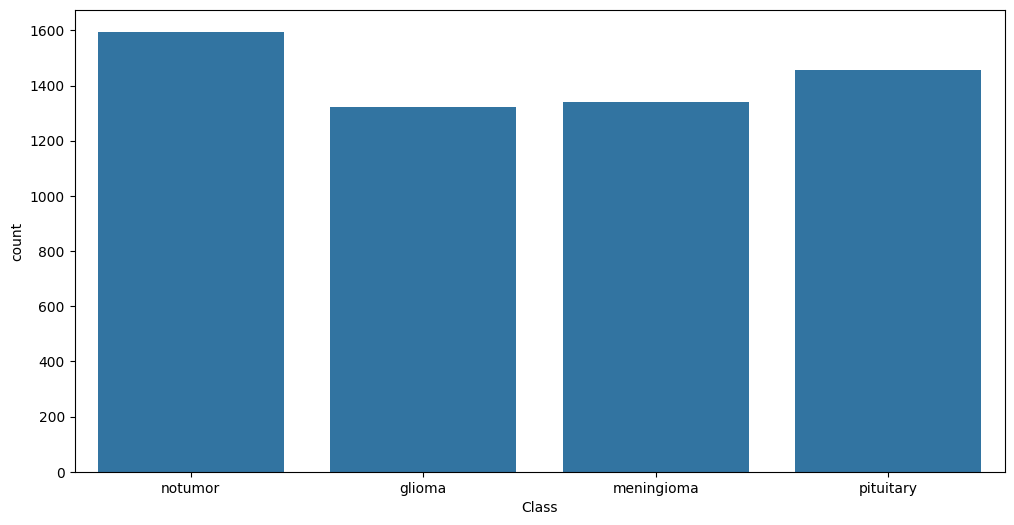

In [ ]:
plt.figure(figsize=(12,6))
ax= sns.countplot(data=tr_df, x=tr_df['Class'])

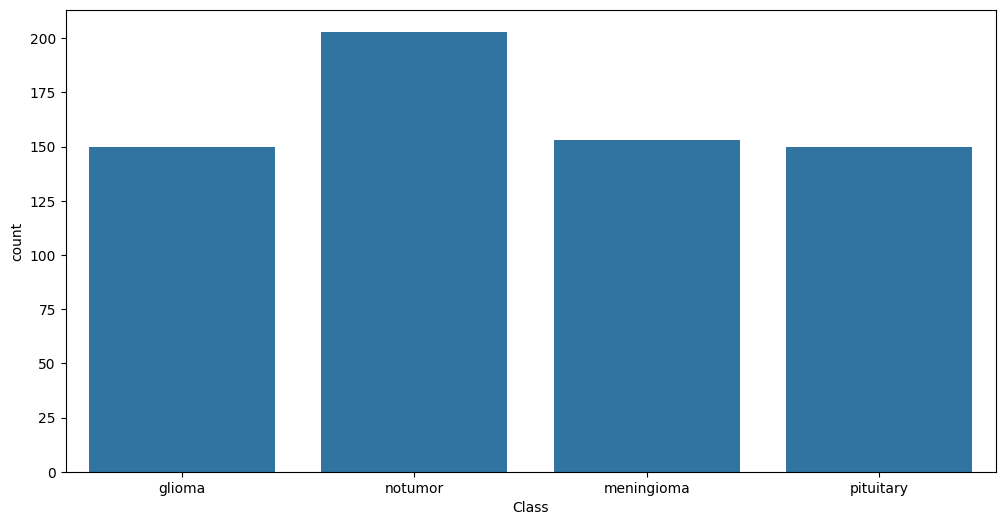

In [ ]:
plt.figure(figsize=(12,6))
ax= sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'] )

In [ ]:
valid_df

,Class Path,Class
1111,/content/Testing/pituitary/Te-pi_0158.jpg,pituitary
750,/content/Testing/meningioma/Te-me_0229.jpg,meningioma
1211,/content/Testing/pituitary/Te-pi_0014.jpg,pituitary
1236,/content/Testing/pituitary/Te-pi_0018.jpg,pituitary
447,/content/Testing/glioma/Te-gl_0040.jpg,glioma
...,...,...
103,/content/Testing/notumor/Te-no_0196.jpg,notumor
741,/content/Testing/meningioma/Te-me_0300.jpg,meningioma
411,/content/Testing/glioma/Te-gl_0120.jpg,glioma
735,/content/Testing/meningioma/Te-me_0169.jpg,meningioma


In [ ]:
ts_df

,Class Path,Class
406,/content/Testing/glioma/Te-gl_0043.jpg,glioma
29,/content/Testing/notumor/Te-no_0398.jpg,notumor
859,/content/Testing/meningioma/Te-me_0150.jpg,meningioma
8,/content/Testing/notumor/Te-no_0156.jpg,notumor
1226,/content/Testing/pituitary/Te-pi_0054.jpg,pituitary
...,...,...
293,/content/Testing/notumor/Te-no_0272.jpg,notumor
747,/content/Testing/meningioma/Te-me_0243.jpg,meningioma
375,/content/Testing/notumor/Te-no_0307.jpg,notumor
204,/content/Testing/notumor/Te-no_0255.jpg,notumor


In [ ]:
batch_size = 32
img_size = (299,299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range= (0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle= False)


Found 5712 validated image filenames belonging to 4 classes.
Found 5712 validated image filenames belonging to 4 classes.
Found 5712 validated image filenames belonging to 4 classes.


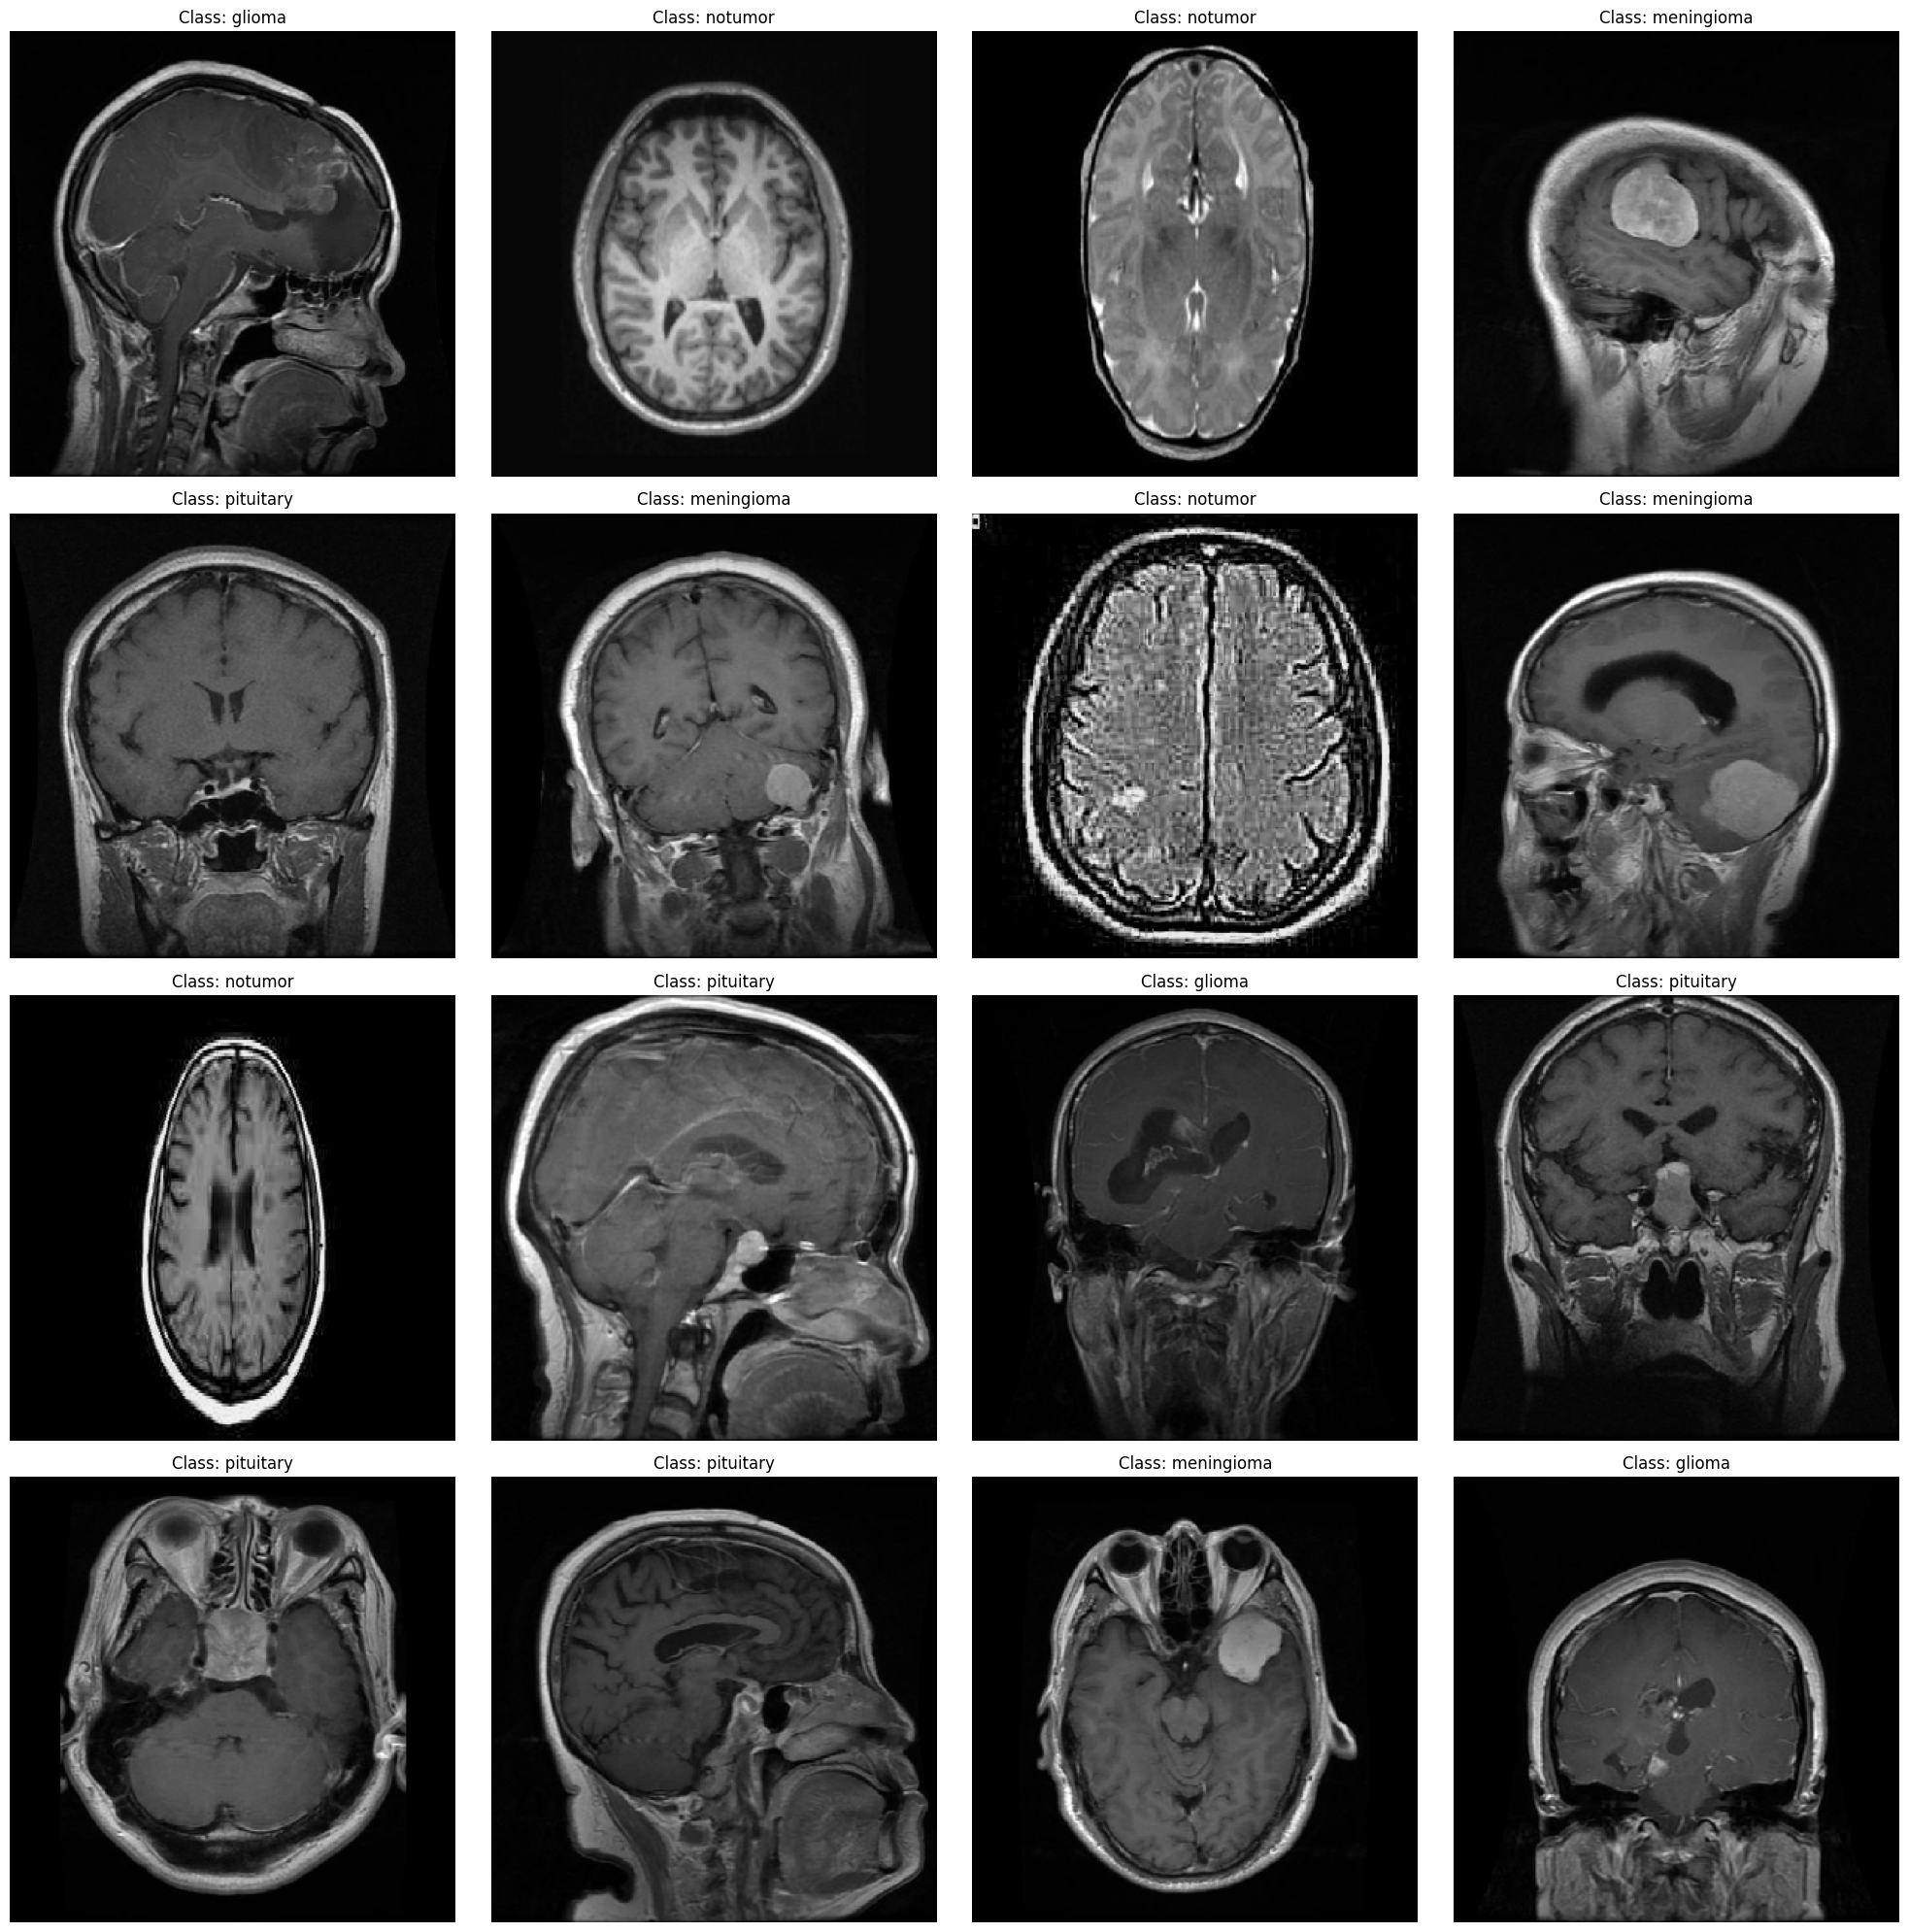

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    batch = next (tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    class_index = np.argmax(label)
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    index_position = class_indices.index(class_index)
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis("off")
plt.tight_layout()
plt.show()
